<a href="https://colab.research.google.com/github/FerdinandYeke/MLA5_FY/blob/main/MLA5_FY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 5
# Ferdinand Yeke
#CS-430 Machine Learning in The Cloud



In [12]:
#Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Imports for Specific Models


In [67]:
#Imports the Voting class, Bagging Class, Random Forest, and Adaboost Classes.
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [9]:
#Imports Classifications
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Defines the Confusion Matrix.


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [10]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# Acquires the the landsat data sets

In [28]:
#This gets the landsat train.csv file and the landsat_test.csv file
# and puts them in there respective varaibles
landsat_train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLA5_FY/landsat_train.csv')
landsat_test= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLA5_FY/landsat_test.csv')

In [17]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [18]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [26]:
landsat_train.value_counts()

top_left_r  top_left_g  top_left_infra1  top_left_infra2  top_middle_r  top_middle_g  top_middle_infra1  top_middle_infra2  top_right_r  top_right_g  top_right_infra1  top_right_infra2  middle_left_r  middle_left_g  middle_left_infra1  middle_left_infra2  central_pixel_r  central_pixel_g  central_pixel_infra1  central_pixel_infra2  middle_right_r  middle_right_g  middle_right_infra1  middle_right_infra2  bottom_left_r  bottom_left_g  bottom_left_infra1  bottom_left_infra2  bottom_middle_r  bottom_middle_g  bottom_middle_infra1  bottom_middle_infra2  bottom_right_r  bottom_right_g  bottom_right_infra1  bottom_right_infra2  land_type
40          29          108              121              43            31            104                117                50           42           96                96                44             29             109                 121                 44               29               104                   121                   44              32              104                  116                  46             34             104                 118                 46               34               104                   114                   40              29              112                  122                  2            1
75          91          101              83               87            103           114                90                 92           108          114               98                78             88             97                  83                  89               106              114                   94                    85              106             114                  94                   76             89             102                 87                  84               106              111                   94                    76              102             111                  91                   3            1
            99          100              79               79            99            104                83                 79           99           109               83                78             96             104                 81                  82               100              104                   81                    82              100             104                  85                   75             91             101                 79                  79               99               105                   83                    83              99              105                  83                   3            1
            95          104              87               71            95            104                87                 75           91           109               92                66             87             100                 85                  66               83               100                   81                    66              83              96                   81                   59             88             101                 83                  67               84               93                    83                    67              84              97                   83                   1            1
                                                          67            83            96                 79                 59           72           85                71                66             87             104                 89                  70               96               104                   89                    63              79              88                   78                   59             77             90                  75                  59               73               97                    79                    59              73              93                   75                   1            1
                                                                                                                                       

#Statistics nad Visual Exploration

<Axes: xlabel='land_type', ylabel='count'>

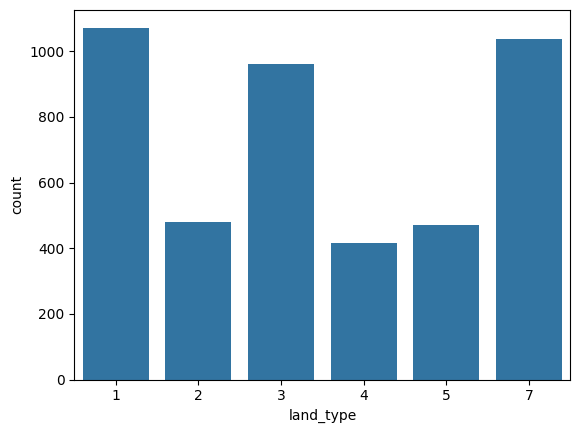

In [31]:
#Creates a bar plot to display the number of land types for
# landsat_train and landsat_test.

sns.barplot(landsat_train['land_type'].value_counts())


<Axes: xlabel='land_type', ylabel='count'>

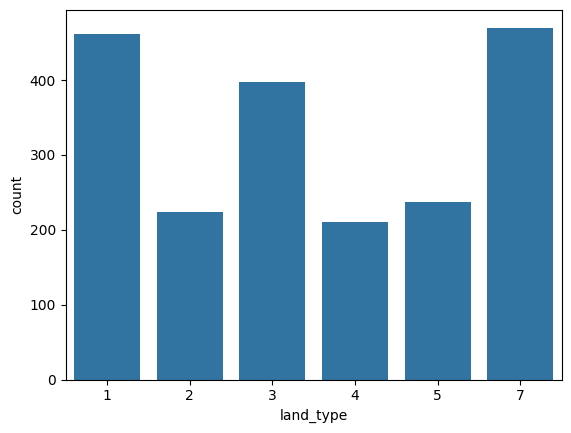

In [32]:
sns.barplot(landsat_test['land_type'].value_counts())

#Splitting Data into Train/Test

In [35]:
#This manually splits the train/test data given already even further.
X_train= landsat_train.drop('land_type',axis=1)
X_test= landsat_test.drop('land_type',axis=1)
y_train= landsat_train['land_type']
y_test= landsat_test['land_type']

In [50]:
X_train.shape[1]

36

#Building the Pipeline


In [55]:
#Since we have two datasets that are similar yet distinct that have to be
# worked on, MinMaxScaler had to be called into a variable named MM_Scaler.
# After that, two new variables get called that are X_train_scaled and X_test_scaled
#, which are variables that MM_Scaler fits the x_train, and transforms the X_test
# dataset. *(Note: After this, the Num_features variable gets set to X_train_scaled
# and X_test_Scaled so that putting these multi varaibles gets cleanly put
#into the ColumnTransformers. I think this may produce errors/artifacts.)

#Instead, the use of PCA (Principal Component Analysis) class would seem to be appropriate here, since multiple datasets
# are in use.
from sklearn.decomposition import PCA
MM_Scaler= MinMaxScaler()
X_train_scaled= MM_Scaler.fit_transform(X_train)
X_test_scaled= MM_Scaler.transform(X_test)
#Num_features= X_train.select_dtypes(include='number'), X_test.select_dtypes(include='number')

In [57]:
pca= PCA(n_components=0.97)
X_train_pca= pca.fit_transform(X_train_scaled)
X_test_pca= pca.transform(X_test_scaled)
#num_features= X_train_pca, X_test_pca

In [58]:
#Makes the column transformer that minmax scales the numerical values
#preprocessor= ColumnTransformer(transformers=[('num', MinMaxScaler(), num_features)])

In [63]:
#Now, this uses this "special ColumnTransformer" and puts it into a pipeline
# with the RandomForestClassifier algorithmn.
RF_pipeline= Pipeline([
 ('classifier', RandomForestClassifier(random_state=42))])

# Executing the Model

In [64]:
#After the pipeline ran, the RandomForestClassification model gets fitted.
RF_pipeline.fit(X_train_pca, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

#Evaluating the Model

In [ ]:
#Now, the pipeline gets ran to preict y values from the test data set.

In [65]:
y_pred= RF_pipeline.predict(X_test_pca)

In [68]:
#This prints out the precision, recall, and F1 score with the classification
# function
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       461
           2       0.96      0.98      0.97       224
           3       0.87      0.94      0.90       397
           4       0.78      0.59      0.67       211
           5       0.90      0.87      0.89       237
           7       0.86      0.90      0.88       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



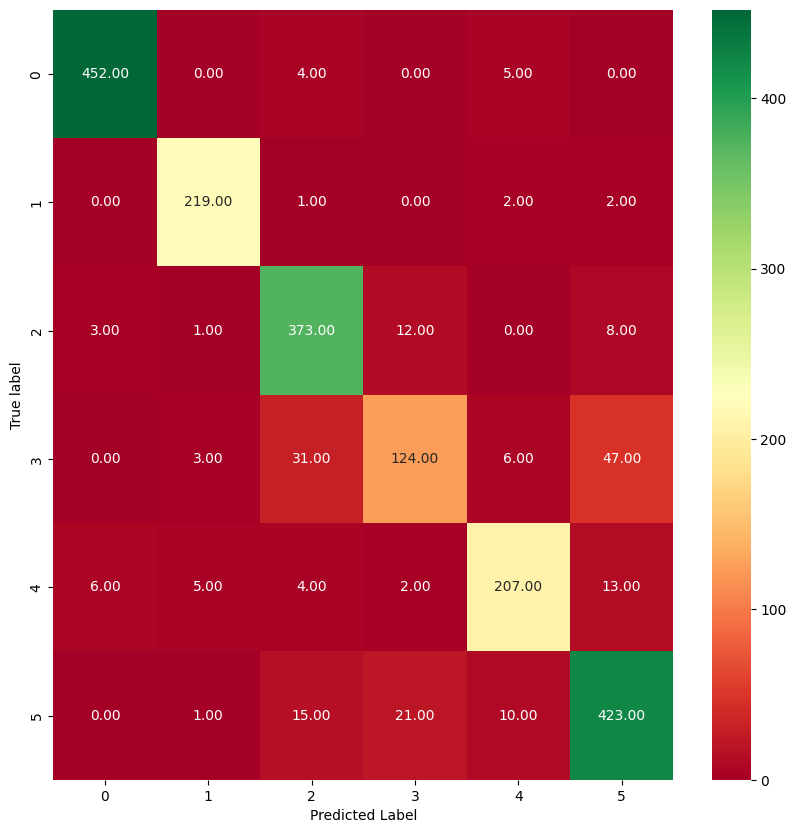

In [69]:
#Now, the ConfusionMatrixDisplay function is used to display a heatmap
# of the confusion matrix.
plot_cm(y_test, y_pred)

# Conclusion

In [ ]:
#How suitable I think that this model is suitable for predicting the land
# type is while it does indeed work and gives reasonable predictions,
# its precision score, f1-score, and recall score does not really give it
# a perfect score of 1.0 of each predicted label, with the macro
#avg and the weighted avg for all of them combined gives a score of less
#than 1.0.

#Problem 2

In [ ]:
#This will be similar to problem 1, however instead of using
# the RandomForestClassifier, one classifier I would like to use it the
# Bagging Classifier.

In [82]:
#Uses the same landsat dataset, but the variables are renamed to indicate
# it will be used for the Voting Classifier instead.
X_trainB= landsat_train.drop('land_type',axis=1)
X_testB= landsat_test.drop('land_type',axis=1)
y_trainB= landsat_train['land_type']
y_testB= landsat_test['land_type']

In [83]:
#Like last time, this uses the same setup to min max scale the X_train and
# transform X_test, but again the variables are renamed with a V at the end
# of train and test.
MM_Scaler= MinMaxScaler()
X_trainB_scaled= MM_Scaler.fit_transform(X_trainB)
X_testB_scaled= MM_Scaler.transform(X_testB)

In [84]:
pca= PCA(n_components=0.97)
X_trainB_pca= pca.fit_transform(X_trainB_scaled)
X_testB_pca= pca.transform(X_testB_scaled)

In [92]:
#Now, this uses Bagging Classifier class and makes a pipeline for it.
#from sklearn.tree import DecisionTreeClassifier
BC_pipeline= Pipeline([
 ('bagging_classifier', BaggingClassifier())])


In [93]:
BC_pipeline.fit(X_trainB_pca, y_trainB)

Pipeline(steps=[('bagging_classifier', BaggingClassifier())])

In [96]:
#Now, the BC_pipeline is ran here to predict y values from the test data
# set while saving them in a variable called y_pred like in the last problem.
y_predB= BC_pipeline.predict(X_testB_pca)

In [97]:
#Now calls the classification model to display the precision, recall, and F1
# score for each class.
print(classification_report(y_testB, y_predB))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       461
           2       0.94      0.96      0.95       224
           3       0.88      0.91      0.90       397
           4       0.66      0.60      0.63       211
           5       0.85      0.84      0.84       237
           7       0.85      0.85      0.85       470

    accuracy                           0.88      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.88      0.87      2000



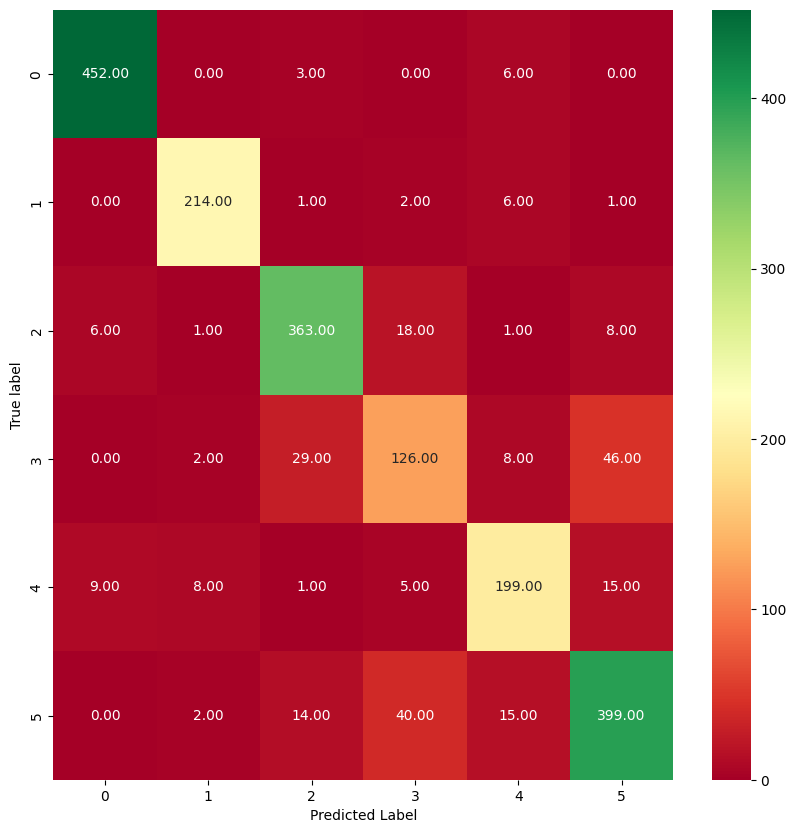

In [98]:
#Lastly, this calls the ConfusionMatrixDisplay function that shows a heatmap
# of the confusion matrix.
plot_cm(y_testB, y_predB)

In [ ]:
#Conclusion: How suitable I think this model is for predicting the land type
# is that while it did show reasonable predictions like the last model like
# in the confusion matrix, the classification report for this model showed
# even lower scores by weight avg, macro avg, and the scores for almost each
# label. Though this did have some high scores like with its labels, I think
# that the other model (RandomForestClassification model), will be much more
# suitable for predicting the land type compared to this model (Bagging Classification
# model).

#Problem 3

In [ ]:
#Now, this time the banknote_authentication data set is used for the
# RandomForest classifier model. The steps are also mostly the same.

#Reading the Bank Data

In [99]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLA5_FY/banknote_authentication.csv')

In [100]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [146]:
df.dtypes

,0
variance,float64
skewness,float64
curtosis,float64
entropy,float64
forgery,int64


#Splitting the data into train/test sets


In [103]:
X= df.drop('forgery', axis=1)
y= df['forgery']

In [104]:
#Uses train_test splits here for the bank dataset.
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


#Building the Pipeline



In [151]:
#Now, this selects the numerical features of the bank datasets and stores
# it in a num_features variable.
num_features= X_train.select_dtypes(include='number')
#cat_features= df.select_dtypes(include=['object']).columns

In [152]:
#Next, this makes the preprocessor where it is being setup by the ColumnTransformer,
# and the ColumnTransfomer MinMax scaled the numerical variables, which is num_features.
#preprocessor= ColumnTransformer(transformers=
# [('num', MinMaxScaler(), num_features)])

In [155]:
#Now makes a RandomForestClassifier pipeline that transforms the data.
RF_pipeline= Pipeline([
('random_forest',RandomForestClassifier(random_state=42))])

# Executing the Model


In [157]:
#Now, the pipeline will be ran to fit the RandomForestClassifier model
RF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('random_forest', RandomForestClassifier(random_state=42))])

#Evaluating the Model

In [158]:
#Now, this runs the pipeline to predict y values from the test data set, and
# saves them into a variable named y_pred.
y_pred= RF_pipeline.predict(X_test)

In [159]:
#Here, the classification_function is called to display the precision, recall,
# and F1 score for each class.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



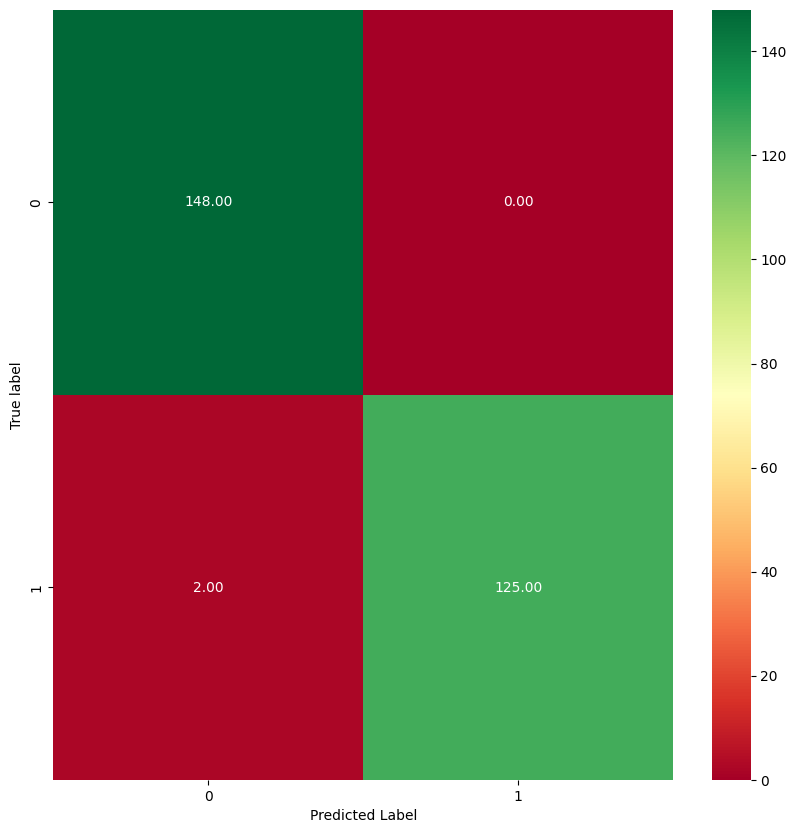

In [160]:
#Lastly, the ConfusionMatrixDisplay function is used to display a heatmap of
# the confusion matrix.
plot_cm(y_test, y_pred)

#Conclusion

In [ ]:
#In conclusion, how suitable I think the model is for predicting the land type is that
# with the classification report of the precision score, recall score, and F1-Score with
# the macro avg, weighted avg, and its values of 0s and 1s of forgery in the data set, and
# the ConfusionMatrix heatmap, the classification report shows that all three of the scores give
# a score very close to a 1.0 based on the RandomForestClassifier. I would say that for a dataset like
# this, the RandomForest classifier model would be great to predict the forgeries.